# Mathematical Underpinnings - Lab 3

In [25]:
import numpy as np
import matplotlib.pyplot as plt

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [26]:
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
# def is_shattered(d, n, S_n):
    
#     for y in different assigment of classes to points in S_n:
#         check if they are linearly separable
#         i.e. if we can fit a line so for the points in S_n with classes y the classification error is 0
#
#     if for at least for one y the answer is no, then return False, else return True
#     return True/False

In [27]:
# useful functions to find all possible assigments of classes:
# (I recommend usin combinations, as we don't need to compute the same with the classes swiched)

from itertools import combinations
from itertools import permutations
from itertools import product
from sklearn.svm import SVC

In [28]:
def is_shattered(points, plot=False):
    all_labels = [np.array(labels) for labels in product([0, 1], repeat=len(points))]

    svm = SVC(C=10000, kernel='linear', tol=1e-5, shrinking=False)

    for labels in all_labels:
      if len(np.unique(labels)) > 1:
        svm.fit(points, labels)
        if plot:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].scatter(points.T[0], points.T[1], c=labels)
            ax[0].set_title('True')
            ax[1].scatter(points.T[0], points.T[1], c=svm.predict(points))
            ax[1].set_title('Pred')
            plt.show()
        if svm.score(points, labels) < 1:
            return False
    return True

### c)

In [29]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

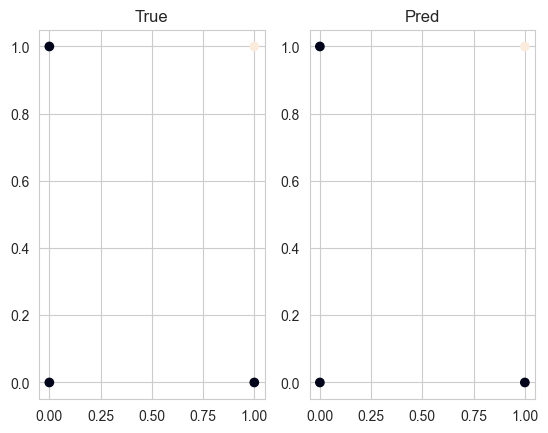

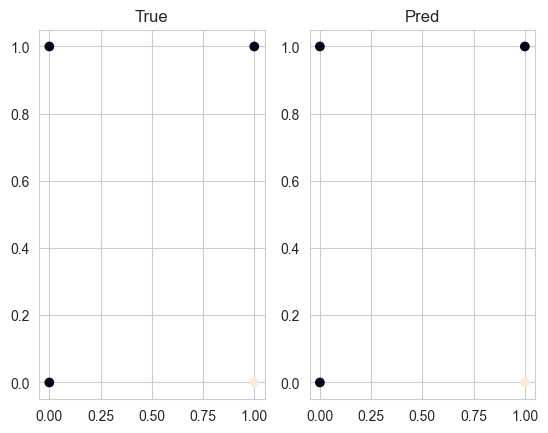

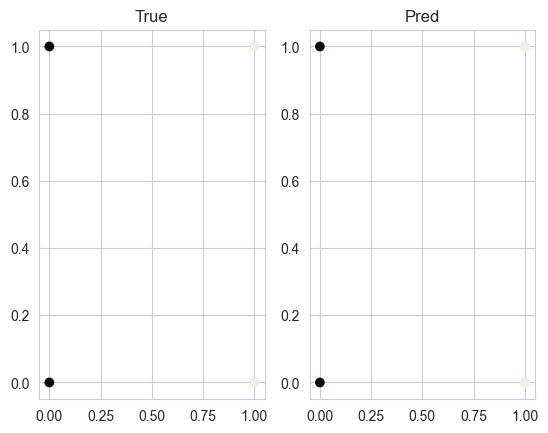

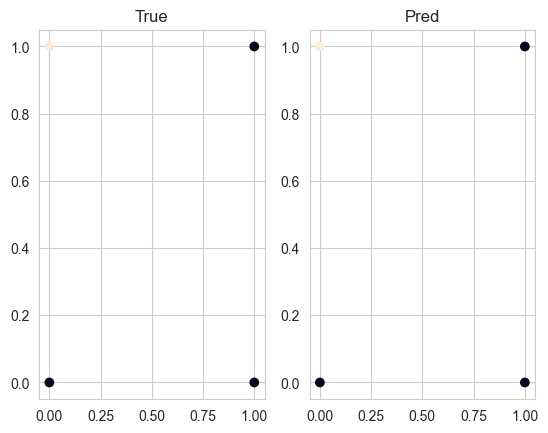

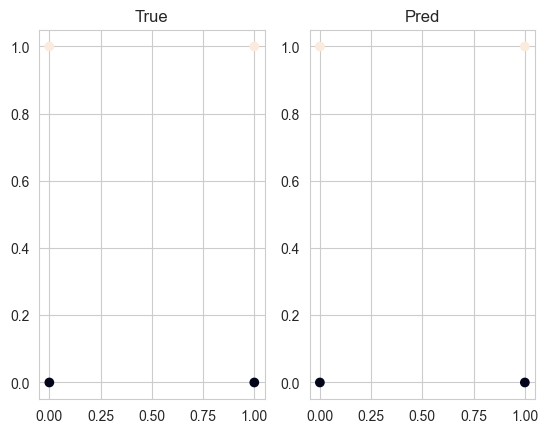

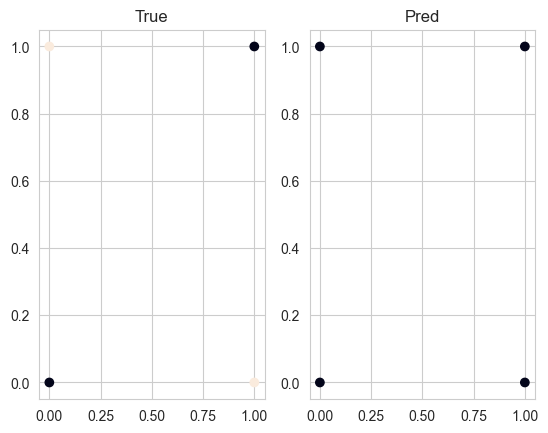

False

In [30]:
points = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
is_shattered(points, plot=True)

### d)

In [23]:
vc = []
down = 2
up = 10
dims = list(range(down, up + 1))
for d in dims:
    n=0
    shattered = True
    while shattered:
        n+=1
        was_shattered = False
        for i in range(50):
            sample = np.random.multivariate_normal(np.zeros(d), np.diag(np.ones(d)), n)
            was_shattered = is_shattered(sample)
            if was_shattered:
                break
        shattered = was_shattered
    vc.append(n)

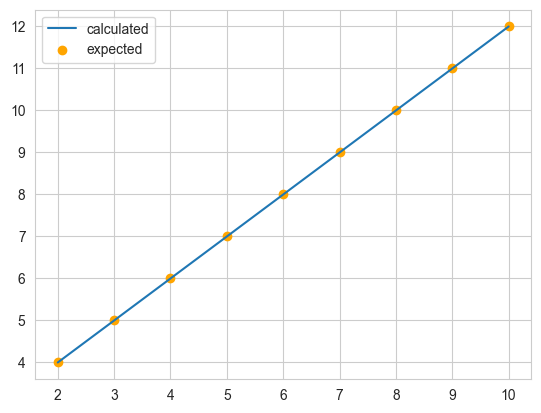

In [24]:
plt.plot(dims, vc, label='calculated')
plt.scatter(dims, vc, label='expected', c='orange')
plt.legend()
plt.show()

### e)

In [ ]:
# A hint: change a kernel in SVM